In [1]:
import numpy as np
from numpy import load
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm
import torch
import torch.nn as nn

In [3]:
d_vector_dev_seg = load('d_vector_dev_seg.npy') #dev seg
d_vector_dev_str = load('d_vector_dev_str.npy') #dev stream
#d_vector_dev_seg = load('d_vector_dev_seg_fbank.npy')

In [4]:
d_vector_dev_seg.shape, d_vector_dev_str.shape 

((8479, 128), (9203, 128))

In [27]:
X_dev = d_vector_dev_seg #segment ground truths
X_train = d_vector_dev_str #stream ground truths

In [6]:
X_train.shape, X_dev.shape

((9203, 128), (8479, 128))

In [7]:
feat_cols_dev = ['features'+str(i) for i in range(X_dev.shape[1]) ]
feat_cols_train = ['features'+str(i) for i in range(X_train.shape[1]) ]

In [8]:
df_dev = pd.DataFrame(X_dev,columns=feat_cols_dev)
df_train = pd.DataFrame(X_train,columns=feat_cols_train)

In [9]:
df_train.shape, df_dev.shape

((9203, 128), (8479, 128))

In [28]:
df_train.describe()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features121,features122,features123,features124,features125,features126,features127,pca-one,pca-two,pca-three
count,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,...,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03,9.203000e+03
mean,-3.243484e+06,-2.257630e+06,-4.419134e+06,-8.963982e+05,4.175748e+06,-2.592818e+06,1.306331e+06,3.144370e+06,-1.002697e+07,-3.574911e+06,...,4.596846e+06,1.015426e+05,2.023486e+06,-4.971958e+05,-6.383804e+06,1.087618e+07,-8.705819e+06,9.644681e+00,-3.416950e+00,1.022884e+01
std,4.824265e+06,3.723374e+06,7.179272e+06,1.793634e+06,6.269002e+06,4.009097e+06,2.843636e+06,4.860308e+06,1.548769e+07,5.565717e+06,...,7.009255e+06,9.844446e+05,3.444288e+06,1.427321e+06,9.491430e+06,1.649996e+07,1.310265e+07,8.182860e+07,1.334386e+07,8.281493e+06
min,-5.499266e+07,-3.996558e+07,-9.356253e+07,-2.297157e+07,1.634157e+03,-4.012968e+07,-1.423407e+07,-8.700446e+05,-1.860448e+08,-7.668514e+07,...,-1.476276e+06,-8.908611e+06,-5.319797e+06,-1.866874e+07,-1.127055e+08,1.504171e+03,-1.547324e+08,-5.446721e+07,-7.751721e+07,-9.494166e+07
25%,-4.656717e+06,-2.994764e+06,-5.849588e+06,-1.041110e+06,2.880082e+05,-3.681146e+06,1.282034e+04,2.084823e+05,-1.400064e+07,-5.017572e+06,...,3.075482e+05,-5.271009e+04,6.468551e+04,-5.874450e+05,-9.144838e+06,7.194997e+05,-1.228644e+07,-5.078229e+07,-2.716926e+06,-8.400294e+05
50%,-8.877320e+05,-5.695800e+05,-9.834016e+05,-1.576564e+05,1.147610e+06,-6.561967e+05,2.695177e+05,8.283786e+05,-2.505099e+06,-8.833279e+05,...,1.178360e+06,7.364225e+03,4.205903e+05,-1.044587e+05,-1.736750e+06,2.879260e+06,-2.327779e+06,-4.018946e+07,-1.640349e+06,-1.415789e+05
75%,-2.338474e+05,-1.363408e+05,-2.056108e+05,-1.362267e+04,5.933770e+06,-1.646439e+05,1.847274e+06,4.478509e+06,-6.129427e+05,-2.079847e+05,...,6.453776e+06,1.292448e+05,2.750338e+06,-9.268700e+03,-4.455089e+05,1.534702e+07,-5.810524e+05,2.289857e+07,-1.583009e+05,9.710559e+05
max,5.081777e+05,1.998703e+06,2.358734e+06,9.154157e+06,7.650062e+07,1.632693e+06,3.368160e+07,4.768984e+07,1.718544e+05,4.972014e+06,...,7.122121e+07,1.165721e+07,4.341421e+07,1.224601e+07,1.288061e+04,1.969990e+08,1.778955e+05,8.957451e+08,1.542807e+08,1.040224e+08


## Dimensionality reduction:

In [10]:
pca_dev = PCA(n_components=3)
pca_result_dev = pca_dev.fit_transform(df_dev[feat_cols_dev].values)

In [11]:
pca_train = PCA(n_components=3)
pca_result_train = pca_train.fit_transform(df_train[feat_cols_train].values)

In [12]:
df_dev['pca-one'] = pca_result_dev[:,0]
df_dev['pca-two'] = pca_result_dev[:,1]
df_dev['pca-three'] = pca_result_dev[:,2]
print('variation per principal component: {}'.format(pca_dev.explained_variance_ratio_))

variation per principal component: [0.98380186 0.00831594 0.0039763 ]


In [13]:
df_train['pca-one'] = pca_result_train[:,0]
df_train['pca-two'] = pca_result_train[:,1]
df_train['pca-three'] = pca_result_train[:,2]
print('variation per principal component: {}'.format(pca_train.explained_variance_ratio_))

variation per principal component: [0.9539982  0.02536889 0.00977138]


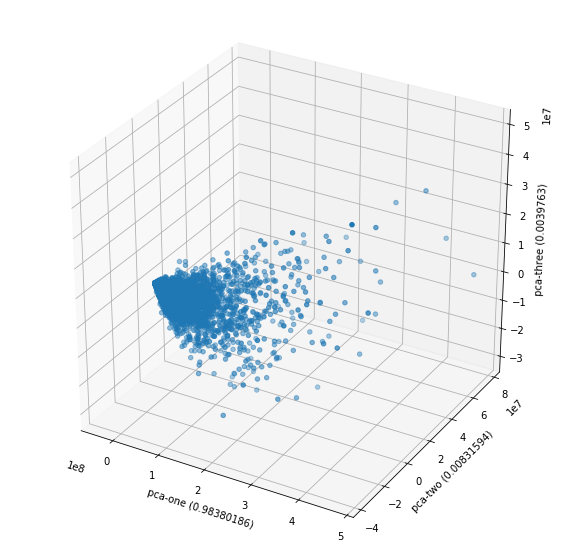

In [20]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
ax.scatter(
xs=df_dev["pca-one"],
ys=df_dev["pca-two"],
zs=df_dev["pca-three"],
cmap='tab10'
)
ax.set_xlabel('pca-one (0.98380186)')
ax.set_ylabel('pca-two (0.00831594)')
ax.set_zlabel('pca-three (0.0039763)')
plt.show()

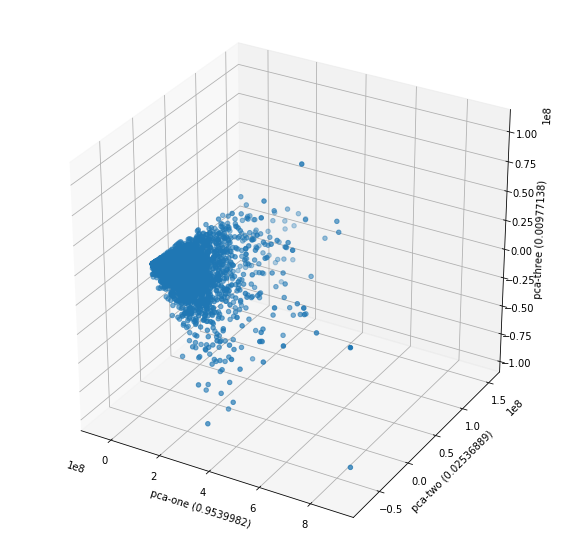

In [21]:
#Trainset PCA

ax = plt.figure(figsize=(10,10)).gca(projection='3d')
ax.scatter(
xs=df_train["pca-one"],
ys=df_train["pca-two"],
zs=df_train["pca-three"],
cmap='tab10'
)
ax.set_xlabel('pca-one (0.9539982)')
ax.set_ylabel('pca-two (0.02536889)')
ax.set_zlabel('pca-three (0.00977138)')
plt.show()

## Clustering algorithms

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [ ]:
dsta1a2 = []
a1 = [1,2,3] #cluster 1
a2 = [1,2,3] #cluster 2
for i in range(len(a1)):
    for j in range(len(a2)):
        dsta1a2.append(distance.euclidean(a1[i], a2[j]))

In [ ]:
dsta1a2[0:9:4]

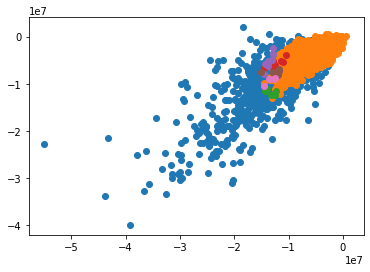

In [43]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X = d_vector_dev_str
# define the model
model = DBSCAN(eps=1.5*10e6, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [36]:
clusters

array([-1,  0,  1,  2])

In [ ]:
#finding Manhattan distance
def manhattan_distance(a, b):
    return np.abs(a - b).sum()

In [ ]:
dist = manhattan_distance(centers[0], centers[100])
dist

In [ ]:
# testing the distances between vectors

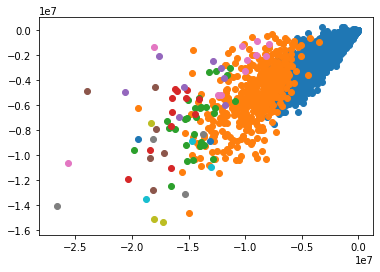

In [37]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X = d_vector_dev_seg
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [38]:
x1 = model.cluster_centers_
x1

array([[  -449616.21524378,   -310154.36003158,   -666124.38832477, ...,
          -866986.8678991 ,   1615760.280088  ,  -1162639.57533427],
       [-12721671.67346939,  -7236797.29591837, -22844878.69387755, ...,
        -27067732.        ,  50933997.22448979, -37589339.63265306],
       [-14259111.        ,  -7801984.61904762, -26529874.85714286, ...,
        -30908986.28571429,  58357219.42857143, -43641577.9047619 ],
       ...,
       [-23995382.        ,  -4862673.        , -45717348.        , ...,
        -56571716.        ,  97326488.        , -73990224.        ],
       [-25623454.        , -10639960.        , -41116528.        , ...,
        -53726876.        ,  98868240.        , -72106608.        ],
       [-26654428.        , -14104860.        , -36072312.        , ...,
        -45903048.        ,  86366864.        , -59357388.        ]])

In [39]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

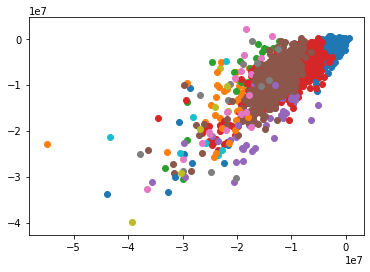

In [40]:
X = d_vector_dev_str
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters_2 = unique(yhat)
# create scatter plot for samples from each cluster
for cluster_2 in clusters_2:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster_2)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [42]:
#finding Euclidean distances
x2 = model.cluster_centers_
x2

array([[-7.1064250e+05, -5.2128341e+05, -7.9926488e+05, ...,
        -1.3392561e+06,  2.2315332e+06, -1.8014341e+06],
       [-2.2229058e+07, -1.3517013e+07, -3.3194104e+07, ...,
        -4.5062080e+07,  7.6404616e+07, -6.0622764e+07],
       [-1.8299790e+07, -8.7543580e+06, -3.7532988e+07, ...,
        -4.2962072e+07,  7.9774912e+07, -6.2502488e+07],
       ...,
       [-4.3326660e+07, -2.1479976e+07, -5.8571136e+07, ...,
        -7.6790488e+07,  1.4057176e+08, -9.6688272e+07],
       [-4.3866968e+07, -3.3859196e+07, -4.1498708e+07, ...,
        -7.1442528e+07,  1.0606278e+08, -9.2065232e+07],
       [-5.4992656e+07, -2.2823978e+07, -8.0495640e+07, ...,
        -1.1270550e+08,  1.9699896e+08, -1.4366088e+08]], dtype=float32)

In [ ]:
dst = []
for i in range(len(x1)):
    for j in range(len(x2)):
        dst.append(distance.euclidean(x1[i], x2[j]))

dst[0:27889:219]

In [ ]:
def square_rooted(x):
    return round(np.sqrt(sum([a*a for a in x])),8)
  
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),8)


In [ ]:
a1 = [9,9,9]
a2 = [1,1,3]
cosine_similarity(a1, a2)

In [ ]:
#slice d_vector_dev_seg according to spk_occurance_dev
d_vector_dev_seg.shape, c.shape

In [ ]:
815-99

In [ ]:
a = []
b = []
for i in tqdm(range(17)):
    for j in range(len(c)):
        similarity = cosine_similarity(d_vector_dev_seg[i], c[j]) #assign AFD1
        b.append(similarity)
    a.append(b)